# Home 4: Build a CNN for image recognition.

### Name: [Haihan Hu]


## 0. You will do the following:

1. Read, complete, and run the code.

2. **Make substantial improvements** to maximize the accurcy.
    
3. Convert the .IPYNB file to .HTML file.

    * The HTML file must contain the code and the output after execution.
    
    * Missing **the output after execution** will not be graded.
    
4. Upload this .HTML file to your Google Drive, Dropbox, or Github repo. (If you submit the file to Google Drive or Dropbox, you must make the file "open-access". The delay caused by "deny of access" may result in late penalty.)

4. Submit the link to this .HTML file to Canvas.

    * Example: https://github.com/wangshusen/CS583-2020S/blob/master/homework/HM4/HM4.html


## Requirements:

1. You can use whatever CNN architecture, including VGG, Inception, and ResNet. However, you must build the networks layer by layer. You must NOT import the archetectures from ```keras.applications```.

2. Make sure ```BatchNormalization``` is between a ```Conv```/```Dense``` layer and an ```activation``` layer.

3. If you want to regularize a ```Conv```/```Dense``` layer, you should place a ```Dropout``` layer **before** the ```Conv```/```Dense``` layer.

4. An accuracy above 70% is considered reasonable. An accuracy above 80% is considered good. Without data augmentation, achieving 80% accuracy is difficult.


## Google Colab

- If you do not have GPU, the training of a CNN can be slow. Google Colab is a good option.

- Keep in mind that you must download it as an IPYNB file and then use IPython Notebook to convert it to HTML.

- Also keep in mind that the IPYNB and HTML files must contain the outputs. (Otherwise, the instructor will not be able to know the correctness and performance.) Do the followings to keep the outputs.

- In Colab, go to ```Runtime``` --> ```Change runtime type``` --> Do NOT check ```Omit code cell output when saving this notebook```. In this way, the downloaded IPYNB file contains the outputs.

## 1. Data preparation

### 1.1. Load data


In [2]:
from keras.datasets import cifar10
import numpy

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('shape of x_train: ' + str(x_train.shape))
print('shape of y_train: ' + str(y_train.shape))
print('shape of x_test: ' + str(x_test.shape))
print('shape of y_test: ' + str(y_test.shape))
print('number of classes: ' + str(numpy.max(y_train) - numpy.min(y_train) + 1))

Using TensorFlow backend.


170500096/170498071 [==============================] - 4s 0us/step
shape of x_train: (50000, 32, 32, 3)
shape of y_train: (50000, 1)
shape of x_test: (10000, 32, 32, 3)
shape of y_test: (10000, 1)
number of classes: 10


### 1.2. One-hot encode the labels

In the input, a label is a scalar in $\{0, 1, \cdots , 9\}$. One-hot encode transform such a scalar to a $10$-dim vector. E.g., a scalar ```y_train[j]=3``` is transformed to the vector ```y_train_vec[j]=[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]```.

1. Define a function ```to_one_hot``` that transforms an $n\times 1$ array to a $n\times 10$ matrix.

2. Apply the function to ```y_train``` and ```y_test```.

In [3]:
def to_one_hot(y, num_class=10):
    results = numpy.zeros((len(y), num_class))
    for i, y in enumerate(y):
        results[i, y] = 1
    return results

y_train_vec = to_one_hot(y_train)
y_test_vec = to_one_hot(y_test)

print('Shape of y_train_vec: ' + str(y_train_vec.shape))
print('Shape of y_test_vec: ' + str(y_test_vec.shape))

print(y_train[0])
print(y_train_vec[0])

Shape of y_train_vec: (50000, 10)
Shape of y_test_vec: (10000, 10)
[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


#### Remark: the outputs should be
* Shape of y_train_vec: (50000, 10)
* Shape of y_test_vec: (10000, 10)
* [6]
* [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]

### 1.3. Randomly partition the training set to training and validation sets

Randomly partition the 50K training samples to 2 sets:
* a training set containing 40K samples
* a validation set containing 10K samples


In [4]:
rand_indices = numpy.random.permutation(50000)
train_indices = rand_indices[0:40000]
valid_indices = rand_indices[40000:50000]

x_val = x_train[valid_indices, :]
y_val = y_train_vec[valid_indices, :]

x_tr = x_train[train_indices, :]
y_tr = y_train_vec[train_indices, :]

print('Shape of x_tr: ' + str(x_tr.shape))
print('Shape of y_tr: ' + str(y_tr.shape))
print('Shape of x_val: ' + str(x_val.shape))
print('Shape of y_val: ' + str(y_val.shape))

Shape of x_tr: (40000, 32, 32, 3)
Shape of y_tr: (40000, 10)
Shape of x_val: (10000, 32, 32, 3)
Shape of y_val: (10000, 10)


## 2. Build a CNN and tune its hyper-parameters

1. Build a convolutional neural network model
2. Use the validation data to tune the hyper-parameters (e.g., network structure, and optimization algorithm)
    * Do NOT use test data for hyper-parameter tuning!!!
3. Try to achieve a validation accuracy as high as possible.

### Remark: 

The following CNN is just an example. You are supposed to make **substantial improvements** such as:
* Add more layers.
* Use regularizations, e.g., dropout.
* Use batch normalization.

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras import optimizers

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_42 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
activation_42 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
batch_normalization_43 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
activation_43 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 15, 15, 32)       

In [0]:
from tensorflow.keras import optimizers

learning_rate = 1E-4 # to be tuned!

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=learning_rate),
              metrics=['acc'])

In [44]:
history = model.fit(x_tr, y_tr, batch_size=32, epochs=20, validation_data=(x_val, y_val))

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 16s 403us/sample - loss: 1.6815 - acc: 0.3887 - val_loss: 1.2989 - val_acc: 0.5297
Epoch 2/20
40000/40000 [==============================] - 14s 362us/sample - loss: 1.2959 - acc: 0.5325 - val_loss: 1.1285 - val_acc: 0.5961
Epoch 3/20
40000/40000 [==============================] - 14s 362us/sample - loss: 1.1409 - acc: 0.5977 - val_loss: 1.2226 - val_acc: 0.5827
Epoch 4/20
40000/40000 [==============================] - 14s 358us/sample - loss: 1.0308 - acc: 0.6359 - val_loss: 0.9380 - val_acc: 0.6706
Epoch 5/20
40000/40000 [==============================] - 14s 357us/sample - loss: 0.9454 - acc: 0.6656 - val_loss: 0.9936 - val_acc: 0.6565
Epoch 6/20
40000/40000 [==============================] - 14s 359us/sample - loss: 0.8805 - acc: 0.6903 - val_loss: 0.8722 - val_acc: 0.6971
Epoch 7/20
40000/40000 [==============================] - 14s 358us/sample - loss: 0.8230 - acc: 0.7099 

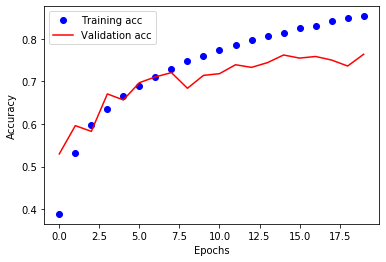

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [46]:
score = model.evaluate(x_val, y_val, verbose=1)
print('Training loss: {0:.4f}\nTraining accuracy: {1:.4f}'.format(*score))

10000/10000 [==============================] - 1s 133us/sample - loss: 0.7562 - acc: 0.7638
Training loss: 0.7562
Training accuracy: 0.7638


## 3. Train (again) and evaluate the model

- To this end, you have found the "best" hyper-parameters. 
- Now, fix the hyper-parameters and train the network on the entire training set (all the 50K training samples)
- Evaluate your model on the test set.

### 3.1. Train the model on the entire training set

Why? Previously, you used 40K samples for training; you wasted 10K samples for the sake of hyper-parameter tuning. Now you already know the hyper-parameters, so why not using all the 50K samples for training?

In [0]:
<Compile your model again (using the same hyper-parameters)>
...

In [0]:
<Train your model on the entire training set (50K samples)>
<Use (x_train, y_train_vec) instead of (x_tr, y_tr)>
<Do NOT use the validation_data option (because now you do not have validation data)>
...

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,)
datagen.fit(x_train)

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras import optimizers

model2 = Sequential()
model2.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Conv2D(32, (3, 3)))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(MaxPooling2D((2, 2)))

model2.add(Conv2D(64, (3, 3), padding='same'))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Conv2D(64, (3, 3)))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(MaxPooling2D((2, 2)))

model2.add(Conv2D(128, (3, 3), padding='same'))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Conv2D(128, (3, 3)))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(MaxPooling2D((2, 2)))

model2.add(Flatten())
model2.add(Dropout(0.5))
model2.add(Dense(512))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Dense(10, activation='softmax'))

model2.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_63 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
activation_63 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
batch_normalization_64 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
activation_64 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 15, 15, 32)       

In [57]:
learning_rate = 1E-4 # to be tuned!
model2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=learning_rate),
              metrics=['acc'])
model2.fit_generator(datagen.flow(x_train, y_train_vec, batch_size=32),
                    steps_per_epoch=x_train.shape[0] // 32,
                    epochs=100)

1562/1562 [==============================] - 34s 22ms/step - loss: 0.6862 - acc: 0.7662
Epoch 91/100
1562/1562 [==============================] - 34s 22ms/step - loss: 0.6789 - acc: 0.7717
Epoch 92/100
1562/1562 [==============================] - 34s 22ms/step - loss: 0.6781 - acc: 0.7712
Epoch 93/100
1562/1562 [==============================] - 34s 22ms/step - loss: 0.6804 - acc: 0.7694
Epoch 94/100
1562/1562 [==============================] - 34s 22ms/step - loss: 0.6778 - acc: 0.7715
Epoch 95/100
1562/1562 [==============================] - 34s 22ms/step - loss: 0.6791 - acc: 0.7716
Epoch 96/100
1562/1562 [==============================] - 34s 22ms/step - loss: 0.6728 - acc: 0.7709
Epoch 97/100
1562/1562 [==============================] - 34s 22ms/step - loss: 0.6738 - acc: 0.7724
Epoch 98/100
1562/1562 [==============================] - 34s 22ms/step - loss: 0.6693 - acc: 0.7710
Epoch 99/100
1562/1562 [==============================] - 34s 22ms/step - loss: 0.6654 - acc: 0.7749
Epo

### 3.2. Evaluate the model on the test set

Do NOT used the test set until now. Make sure that your model parameters and hyper-parameters are independent of the test set.

In [59]:
loss_and_acc = model2.evaluate(x_test, y_test_vec)
print('loss = ' + str(loss_and_acc[0]))
print('accuracy = ' + str(loss_and_acc[1]))

10000/10000 [==============================] - 1s 141us/sample - loss: 0.6463 - acc: 0.7998
loss = 0.646286302280426
accuracy = 0.7998
